In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape    #3D array

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

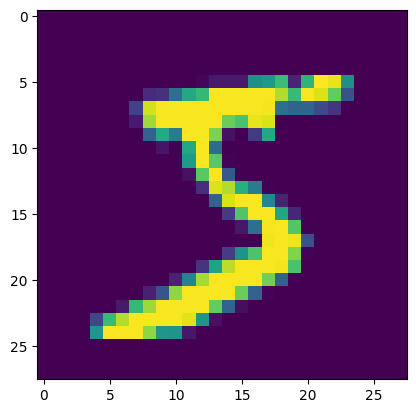

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [7]:
X_train = X_train/255
X_test = X_test/255         #here data is in pixel format

In [29]:
model = Sequential()
model.add(Flatten(input_shape= (28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(loss="sparse_categorical_crossentropy", optimizer= 'Adam', metrics = ['accuracy'])

In [32]:
history = model.fit(X_train, y_train, epochs = 25, validation_split=0.2 )

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8711 - loss: 0.4460 - val_accuracy: 0.9598 - val_loss: 0.1326
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9686 - loss: 0.1046 - val_accuracy: 0.9667 - val_loss: 0.1097
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9802 - loss: 0.0647 - val_accuracy: 0.9718 - val_loss: 0.0984
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9837 - loss: 0.0487 - val_accuracy: 0.9733 - val_loss: 0.0947
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9878 - loss: 0.0362 - val_accuracy: 0.9723 - val_loss: 0.1043
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9892 - loss: 0.0316 - val_accuracy: 0.9667 - val_loss: 0.1279
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9913 - loss: 0.0253 - val_accuracy: 0.9742 - val_loss: 0.1104
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9933 - loss: 0.021

In [33]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [34]:
y_pred = y_prob.argmax(axis = 1)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

#to improve accuracy we can change architecture(activation fun) increase layers or increase epochs

0.979

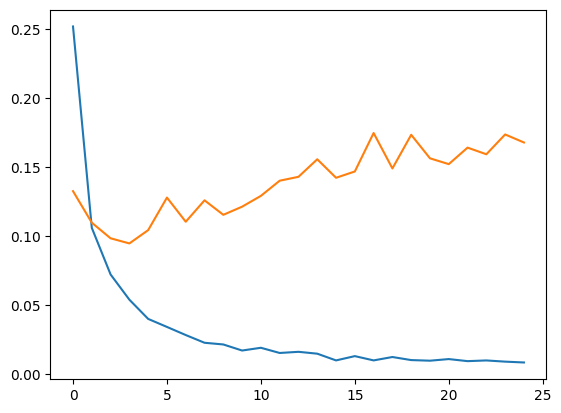

In [36]:
plt.plot(history.history['loss'])
# with increase in epochs training loss is reducing

plt.plot(history.history['val_loss'])

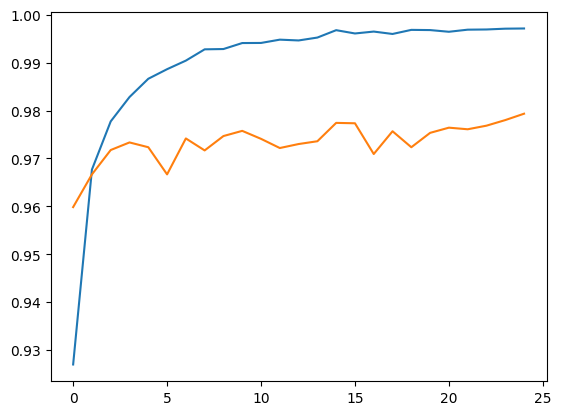

In [37]:
plt.plot(history.history['accuracy'])
# with increase in epochs accuracy has reached 100%

plt.plot(history.history['val_accuracy'])
#overfitting is happening here

###Testing the model

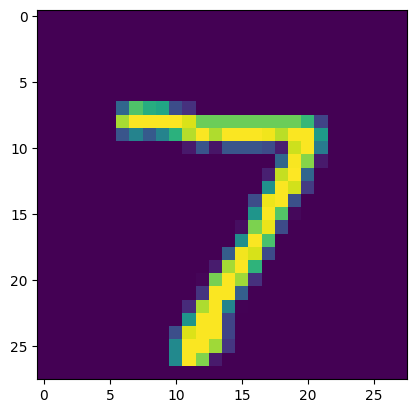

In [38]:
plt.imshow(X_test[0])

In [39]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([7])